In [18]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('transformed_housing_data2')

In [19]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
data['mean_sales'] = data['Sale_Price'].mean()
data['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

# Vidsualizing the mean prediction model with the actual model via plot

In [21]:
import matplotlib.pyplot as plt

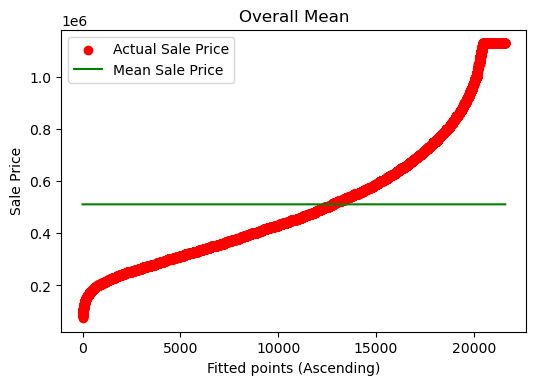

In [22]:
plt.figure(dpi = 100)
k = range(0, len(data))
plt.scatter(k, data['Sale_Price'].sort_values(), color = 'red', label = 'Actual Sale Price')
plt.plot(k, data['mean_sales'].sort_values(), color = 'green', label = 'Mean Sale Price')
plt.xlabel('Fitted points (Ascending)')
plt.ylabel('Sale Price')
plt.title('Overall Mean')
plt.legend()

# improving the mean pridiction model

In [23]:
#we use pivot table function to calculate the mean of the target variable wrt tp any other categorical variable
grades_mean = data.pivot_table(values = 'Sale_Price', columns = 'Overall Grade', aggfunc = np.mean)
grades_mean.head()

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [24]:
#create a new column and substitute the grades mean variable values into the new column
data['Grades_Mean'] = 0

for i in grades_mean.columns:
  data['Grades_Mean'][data['Overall Grade'] == i] = grades_mean[i][0]
    
data['Grades_Mean'].head()

0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: Grades_Mean, dtype: float64

In [28]:
gradewise_list = []
for i in range(1, 11):
    k = data['Sale_Price'][data['Overall Grade'] == i]
    gradewise_list.append(k)

In [29]:
classwise_list = []
for i in range(1, 11):
    k = data['Sale_Price'][data['Overall Grade'] == i]
    classwise_list.append(k)

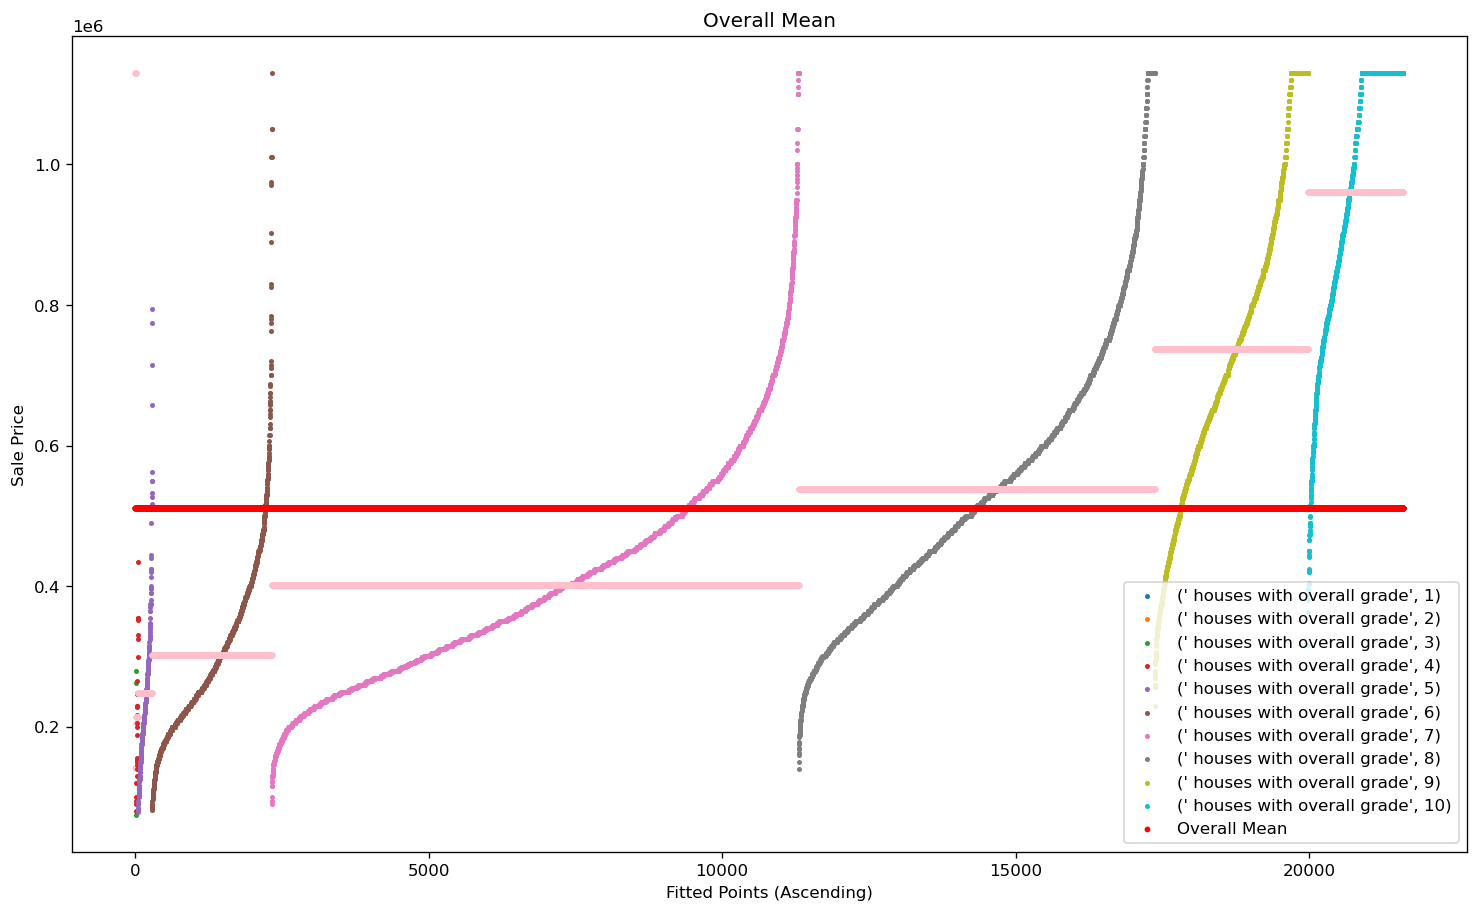

In [32]:
plt.figure(dpi = 120, figsize = (15,9))

### plotiing the sale price gradewise 
## z is used for the x axis

z = 0

for i in range(1, 11):
    #definning the x axis via z
    points = [k for k  in range(z, z+len(classwise_list[i-1]))]
    #plotting
    plt.scatter(points, classwise_list[i-1].sort_values(), label = (' houses with overall grade', i), s = 4)
    #plotting gradewise mean
    plt.scatter(points, [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))], s = 6, color = 'pink')
    ###
    z = max(points) + 1
### Plotting overall mean###
plt.scatter([q for q in range(0, z)], data['mean_sales'], color = 'red', label = 'Overall Mean', s = 6)
###########
plt.xlabel('Fitted Points (Ascending)')
plt.ylabel('Sale Price')
plt.title('Overall Mean')
plt.legend(loc = 4)

# residual plot 

In [33]:
mean_diff = data['mean_sales'] - data['Sale_Price']
grade_mean_diff = data['Grades_Mean'] - data['Sale_Price']

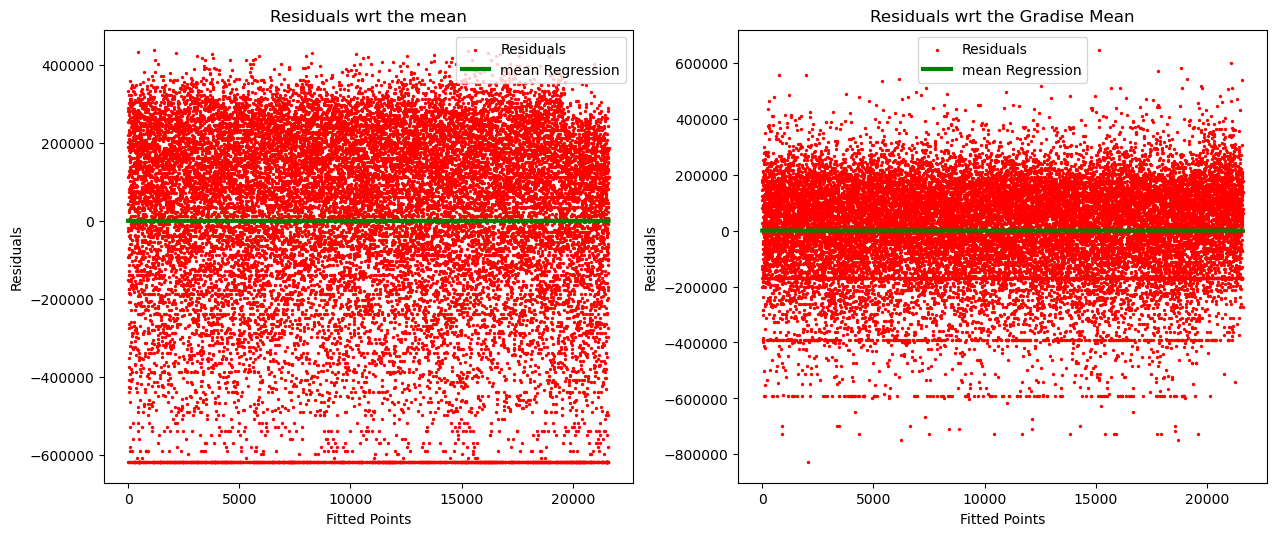

In [35]:
k = range(0, len(data))
l = [0 for i in range(len(data))]

plt.figure(dpi = 100, figsize = (15,6))

plt.subplot(1,2,1)
plt.scatter(k, mean_diff, color = 'red', s = 2,label = 'Residuals' )
plt.plot(k, l, label = 'mean Regression', color = 'green', linewidth = 3)
plt.xlabel('Fitted Points')
plt.ylabel('Residuals')
plt.title('Residuals wrt the mean')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(k, grade_mean_diff, color = 'red', s = 2,label = 'Residuals' )
plt.plot(k, l, label = 'mean Regression', color = 'green', linewidth = 3)
plt.xlabel('Fitted Points')
plt.ylabel('Residuals')
plt.title('Residuals wrt the Gradise Mean')
plt.legend()

# model evaluation metrics

In [36]:
Y = data['Sale_Price']
Y_hat1 = data['mean_sales']
Y_hat2 = data['Grades_Mean']
n = len(data)

len(Y), len(Y_hat1), len(Y_hat2),n

(21609, 21609, 21609, 21609)

In [37]:
cost = sum(abs(Y_hat1 - Y))/n
cost

199168.78146839526

In [38]:
cost = sum(abs(Y_hat2 - Y))/n
cost

137081.70298203363

In [39]:
from sklearn.metrics import mean_absolute_error
cost1 = mean_absolute_error(Y_hat1, Y)
cost2 = mean_absolute_error(Y_hat2, Y)

cost1, cost2

(199168.7814684109, 137081.7029820291)

In [40]:
from sklearn.metrics import mean_squared_error
cost3 = mean_squared_error(Y_hat1, Y)
cost4 = mean_squared_error(Y_hat2, Y)

cost3, cost4

(62528116847.799576, 30804835720.342426)

In [41]:
from sklearn.metrics import mean_squared_error
cost5 = mean_squared_error(Y_hat1, Y)**0.5
cost6 = mean_squared_error(Y_hat2, Y)**0.5

cost5, cost6

(250056.2273725643, 175513.06424406826)

# R2 method for the evaluation


In [42]:
Y = data['Sale_Price']
Y_bar = data['mean_sales']
Y_hat = data['Grades_Mean']
n = len(data)

len(Y), len(Y_bar), len(Y_hat), n

(21609, 21609, 21609, 21609)

In [44]:
mse_mean = mean_squared_error(Y_bar, Y)
mse_grade_mean = mean_squared_error(Y_hat, Y)

mse_mean, mse_grade_mean

(62528116847.799576, 30804835720.342426)

In [45]:
R2 = 1 - mse_grade_mean/mse_mean
R2

0.5073442592981836